# Pacific Atlantic Water Flow

There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.

 

Example 1:


Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]

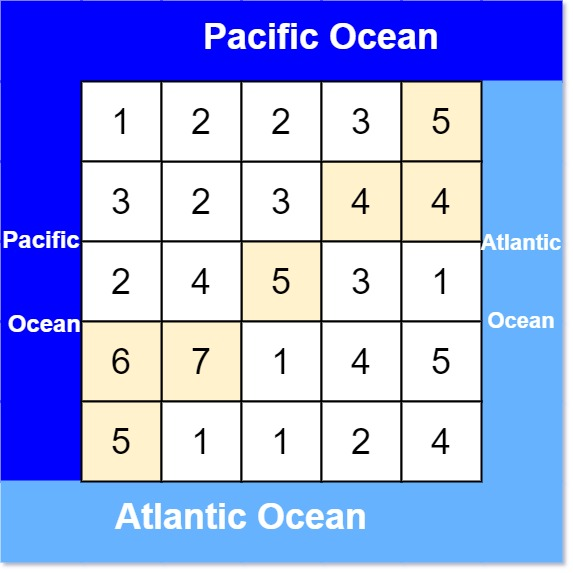

Example 2:

Input: heights = [[2,1],[1,2]]
Output: [[0,0],[0,1],[1,0],[1,1]]


## Solution:

If we try to look at the problem closely from 1st row and 1st column we can always visit pacific ocean, similarly we can always visit atlantic ocean from last row and last column. Also the water can only flow from a cell if the adjacent cell's height is smaller or same of the current cell.

We will start from the border row and columns and for each cell we will traverse the adjacent cell using BFS/ DFS and we will maintain a visited set. The catch is as we are starting from opposite direction (ocean to inner grid) we will only add a neighbor's co-ordinate to the visited cell if the value of the it's height is greater or equal to the current cell's height.

More explaination: https://www.youtube.com/watch?v=s-VkcjHqkGI

In [4]:
class Solution:
    def pacificAtlantic(self, heights):
        # initializ two sets for atlantic and pacific coordinates
        atl,pac=set(),set()
        rows,cols=len(heights),len(heights[0])
        
        # dfs method to traverse through nodes
        def dfs(row,col,visited,prevHeight):
            # if current coordinate is outside the grid or already visited or height is lesser than prev cell - return
            if((row<0 or row>rows-1)or(col<0 or col>cols-1)or (heights[row][col]<prevHeight) or ((row,col) in visited)):
                return
            visited.add((row,col))
            # call dfs for it's adjacent cells
            #i.e. for (1,2) - neighbors are (0,2)(2,2),(1,1),(1,3)
            dfs(row-1,col,visited,heights[row][col])
            dfs(row+1,col,visited,heights[row][col])
            dfs(row,col-1,visited,heights[row][col])
            dfs(row,col+1,visited,heights[row][col])
            
        # from col[0] and row[0] we can always reach pacific ocean
        # from col[n-1] and row[n-1] we can reach atlantic ocean
        for col in range(cols):
            dfs(0,col,pac,heights[0][col])
            dfs(rows-1,col,atl,heights[rows-1][col])
            
        for row in range(rows):
            dfs(row, 0,pac,heights[row][0])
            dfs(row,cols-1,atl,heights[row][cols-1])
        
        return atl.intersection(pac)

In [5]:
Solution().pacificAtlantic([[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]])

{(0, 4), (1, 3), (1, 4), (2, 2), (3, 0), (3, 1), (4, 0)}